In [21]:
## Import packages
import pandas as pd
import sklearn as skislopes
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [ ]:
#Issues with this approach, it was splitting on channel identifiers:  "len_channel_description",
# and "len_channel_username". With a large depth, it probably was able to sort each channel into its own bucket
#and from there it guessed if the videos got above or below the specified view count. It probably was sorting more of subscriber size
#and cannot account for virality

In [4]:

df = pd.read_csv(r"no_early_dates_90_days.csv")

In [5]:
#First 80-20 Train Test Split, before the EDA

df_train, df_test = train_test_split(df, shuffle = True, test_size = .2, random_state = 420)

In [6]:
df_train.columns

Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0',
       'channelDescription', 'channelJoinedDate', 'channelTotalVideos',
       'channelTotalViews', 'channelUsername', 'commentsCount', 'date',
       'duration', 'id', 'isChannelVerified', 'likes', 'numberOfSubscribers',
       'order', 'text', 'title', 'url', 'viewCount', 'likes_per_subscriber',
       'comments_per_subscriber', 'views_per_subscriber',
       'duration_in_seconds', 'datetime_date', 'hashtags', 'comm_to_views',
       'likes_to_views', 'popular_brand', 'has_title_affiliate',
       'has_description_affiliate', 'has_channel_description_affiliate',
       'has_any_affiliate', 'has_business_inquiry',
       'engagement_per_subscriber', 'product', 'budget', 'self_ref', 'acronym',
       'korean', 'speed', 'skills/teach', 'skincare', 'comparing_products',
       'datetime', 'hour', 'day_of_week', 'month', 'year', 'day_name',
       'engagement_rate', 'prime_time', 'cluster1', 'prime_time1',
       'postin

In [7]:
df_train.head()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,channelDescription,channelJoinedDate,channelTotalVideos,channelTotalViews,channelUsername,commentsCount,...,year,day_name,engagement_rate,prime_time,cluster1,prime_time1,posting_time_category,prime_hour,hasAdinTitle,hasAdinText
8157,11561,11561,11561,12783,Couple New Blessings Everytime We Pray\nEmail📧...,"Jan 19, 2021",2427.0,1.517580e+09,christxiee,1265.0,...,2024,Monday,7.481461,1,1,1,standard_hours,1,0,0
5844,8271,8271,8271,9023,Easy Makeup & REAL SKIN 💄\nLover of ALL things...,"Oct 12, 2019",496.0,2.414644e+06,thebellesophie,9.0,...,2024,Tuesday,6.618735,0,1,1,poor_performance_time,0,0,0
927,1258,1258,1258,1415,"Hey friends!\n\nMy name is Alex, and on this c...","Aug 1, 2021",2269.0,2.713484e+07,beautyforeverybody,3.0,...,2024,Monday,4.802260,0,0,0,good_performance_time,0,1,0
1463,1967,1967,1967,2124,"Hi there! I love anything skincare, beauty, fo...","Sep 14, 2023",181.0,7.499778e+08,AylenPark,101.0,...,2024,Wednesday,4.709600,0,1,1,prime_time,1,1,1
5013,7288,7288,7288,7617,Easy Makeup & REAL SKIN 💄\nLover of ALL things...,"Oct 12, 2019",496.0,2.414644e+06,thebellesophie,0.0,...,2024,Monday,1.779935,0,0,0,standard_hours,1,0,0


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8741 entries, 8157 to 4486
Data columns (total 59 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0.3                       8741 non-null   int64  
 1   Unnamed: 0.2                       8741 non-null   int64  
 2   Unnamed: 0.1                       8741 non-null   int64  
 3   Unnamed: 0                         8741 non-null   int64  
 4   channelDescription                 8741 non-null   object 
 5   channelJoinedDate                  8741 non-null   object 
 6   channelTotalVideos                 8741 non-null   float64
 7   channelTotalViews                  8741 non-null   float64
 8   channelUsername                    8741 non-null   object 
 9   commentsCount                      8741 non-null   float64
 10  date                               8741 non-null   object 
 11  duration                           8741 non-null   object 

In [10]:
df_train["viewCount"].describe()

count    8.741000e+03
mean     4.252390e+05
std      2.804952e+06
min      2.000000e+00
25%      1.244000e+03
50%      9.276000e+03
75%      7.121800e+04
max      1.246621e+08
Name: viewCount, dtype: float64

<Axes: >

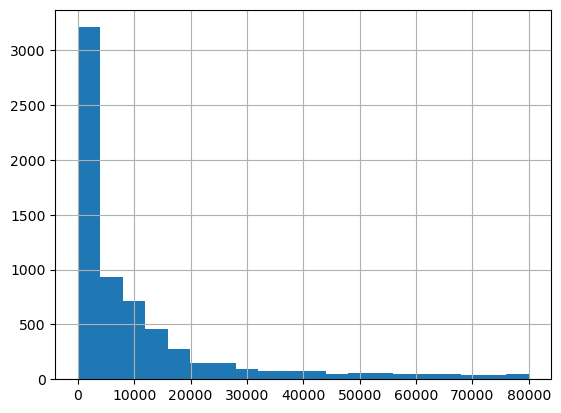

In [ ]:
#10k views seems to be a reasonable cut off point for a decent amount of views, it's a little over the median
df_train.query("viewCount < 8e4")["viewCount"].hist(bins=20)

# Selecting Features

In [12]:
def add_features(df):
    df["len_channel_description"] = df["channelDescription"].str.len()
    df["len_channel_username"] = df["channelUsername"].str.len()
    df["len_title"] = df["title"].str.len()

    df["has_over_10k_views"] = df.eval("viewCount >= 10000").astype(int)
    return df

In [13]:
df_train_with_features = add_features(df_train)

In [15]:
features = ["month", "day_of_week", "hour", "len_channel_description",
            "len_channel_username", "len_title", "channelTotalViews", 
            "channelTotalVideos", "duration_in_seconds",
            "hashtags", "popular_brand", "self_ref", "korean", "prime_hour"]

responder = "has_over_10k_views"

In [16]:
X_train = df_train_with_features[features].values
y_train = df_train_with_features[responder].values

In [19]:
tree_clf = DecisionTreeClassifier(max_depth=10)

## fit the classifier
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [20]:
y_train_preds = tree_clf.predict(X_train)

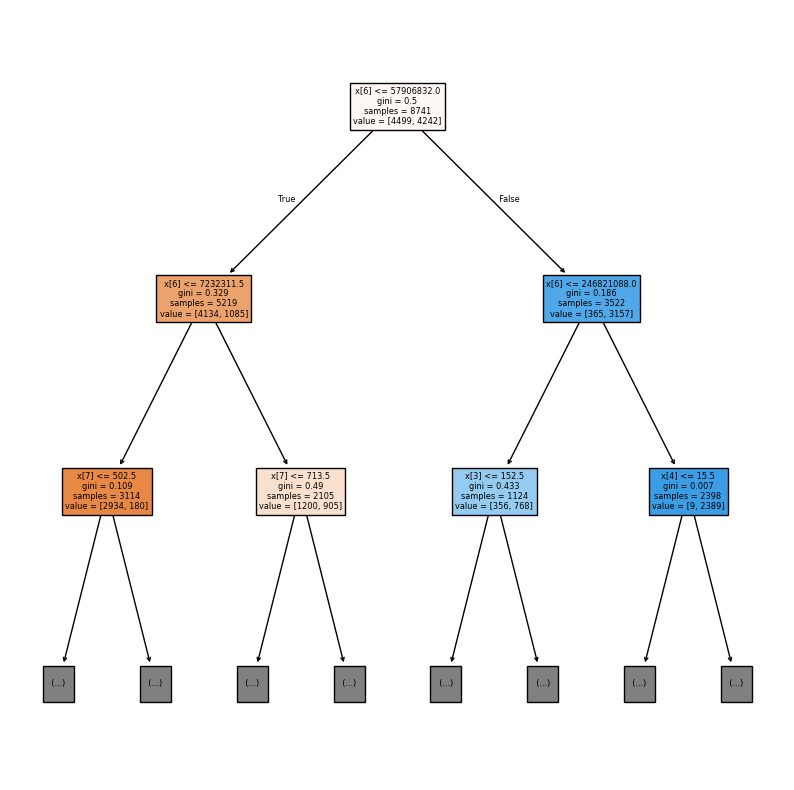

In [24]:
## Plot the fitted tree
plt.figure(figsize = (10,10))
tree.plot_tree(tree_clf, filled = True, max_depth=2)
plt.show()

In [25]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true=y_train, y_pred=y_train_preds)

0.9196888227891545

In [26]:
df_train_with_features["model_predictions"] = y_train_preds

<Axes: >

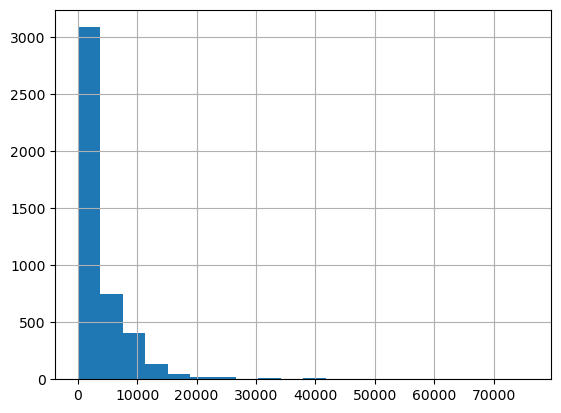

In [27]:
df_train.query("viewCount < 8e4 and model_predictions < 0.5")["viewCount"].hist(bins=20)

<Axes: >

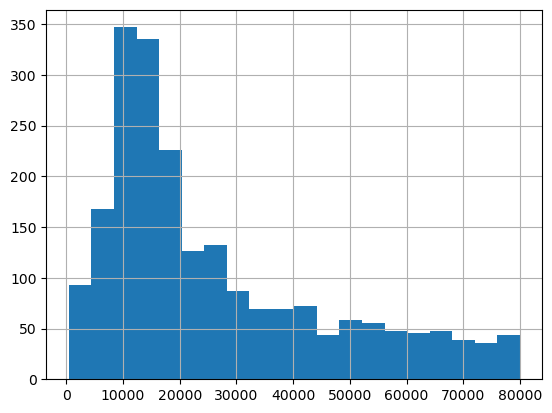

In [28]:
df_train.query("viewCount < 8e4 and model_predictions > 0.5")["viewCount"].hist(bins=20)